In [2]:
#2. Load the training and testing splits of the data set, use the same variable names
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
# 3. Preprocess the training data so that all 784 features look essentially like standard Gaussians 
#by fitting an sklearn ```StandardScaler``` on the training data and applying it to the training and 
#testing data set. Overwrite the original training and test data sets with these processed data sets

from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(np.array(X_train))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 4. Use Matplotlib and the ```helper.get_sprite_image``` function from the Fashion-MNIST repo to 
#display one of each of the ten image classes in the training data set. Show them in a 2 x 5 grid.

import matplotlib.pyplot as plt
from utils.helper import get_sprite_image

list_image_each_class = [None]*10
classes = [0,1,2,3,4,5,6,7,8,9]

for i in range(0, len(X_train)):
    if y_train[i] in classes:
        list_image_each_class[ y_train[i] ] = X_train[i]
        classes.remove( y_train[i] )
        if len(classes) == 0:
            break
    
f, ax_index = plt.subplots(2,5)
count = 0
for i in range(0, 2):
    for j in range(0, 5):
        img = get_sprite_image(list_image_each_class[count])
        ax_index[i,j].imshow(img)
        count += 1

In [5]:
# 5. Use sklearn to fit a multiclass logistic regression model to predict the miage labels, 
# using the SAGA solver (you may need to increase the number of maximum iterations and/or decrease 
# the convergence tolerance). Report the confusion matrices on the test and train data sets.

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l1',solver = 'saga',max_iter=10).fit(X_train, y_train)
pred = LR.predict(X_test)
pred_train = LR.predict(X_train)
score = LR.score(X_test, y_test)
print(score)



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8119


In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

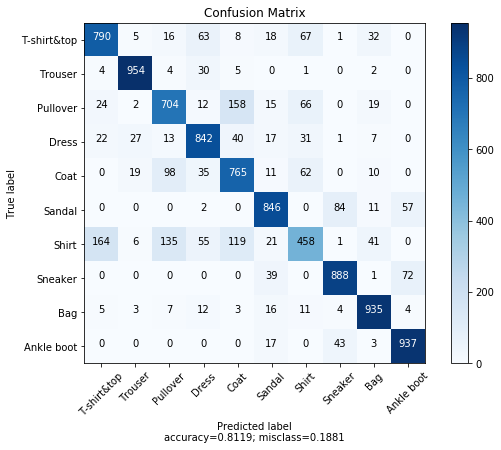

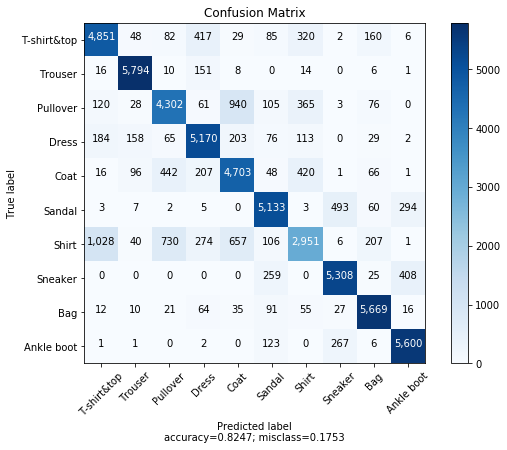

In [7]:
#confusion matrix on test dataset
from sklearn import metrics
cm_test = metrics.confusion_matrix(y_test, pred)
classes = ["T-shirt&top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plot_confusion_matrix(cm_test, 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")

cm_train = metrics.confusion_matrix(y_train, pred_train)
plot_confusion_matrix(cm_train, 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")


In [ ]:
#6. What conclusions do you draw about the performance of the model on the various classes, 
#given the confusion matrix on the test set?

#it has ok perfomance on all the test datasets but misclassified one class a lot.

find
predicted:  Pullover
actual:  T-shirt&top


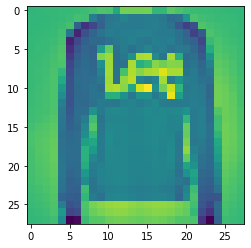

In [21]:
# 7. Select and display one of the misclassified images in the training dataset: what class should 
# it have been classified as, and what class was it misclassified as?

misclassifiedIndex = 0
index = 0
for label, predict in zip(y_train, pred):
    if label != predict:
        misclassifiedIndex = index
        print('find')
        break
    index += 1

img = get_sprite_image(X_test[misclassifiedIndex])
imgplot = plt.imshow(img)

print("predicted: ", classes[pred[misclassifiedIndex]])
print("actual: ", classes[y_train[misclassifiedIndex]])